In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Q1.

In [82]:
df={'mother height':[58,62,60,64,67,70],'daughter height':[60,60,58,60,70,72]}

csv_path='height_data.csv'
df=pd.DataFrame(df)
df.to_csv(csv_path,index=False)


In [83]:
b0,b1=0,0
lr=0.00001
epochs=50000
X=df[['mother height']].values
Y=df['daughter height'].values
l=len(df)

for _ in range(0,epochs):
    d_b0,d_b1=0,0
    for i in range(0,l):
        y=b0+b1*X[i]
        error=Y[i]-y

        d_b0+=-2*error
        d_b1+=-2*X[i]*error
    d_b0=d_b0/l
    d_b1=d_b1/l
    b0=b0-lr*d_b0
    b1=b1-lr*d_b1





In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, log_loss
X=df[['mother height']]
Y=df['daughter height']
model=LinearRegression()
model.fit(X,Y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
print("=========OUTPUT==========")
print("Manual values")
print("b1 -> Slope:",b1)
print("b0 -> Intercept:",b0)
print('\n')
print("Value from sklearn")
print("b1 -> Slope:",model.coef_[0])
print("b0 -> Intercept:",model.intercept_)

=========OUTPUT==========
Manual values
b1 -> Slope: [0.99883442]
b0 -> Intercept: [-0.03855579]


Value from sklearn
b1 -> Slope: 1.2060301507537687
b0 -> Intercept: -13.249581239530976



Metrics for manual GD:
MSE: 6.816469318426339
RMSE: 2.610836900004736


/tmp/ipykernel_129179/651624164.py:8: RuntimeWarning: invalid value encountered in divide
  y_norm = (y - y.min())/(y.max() - y.min())


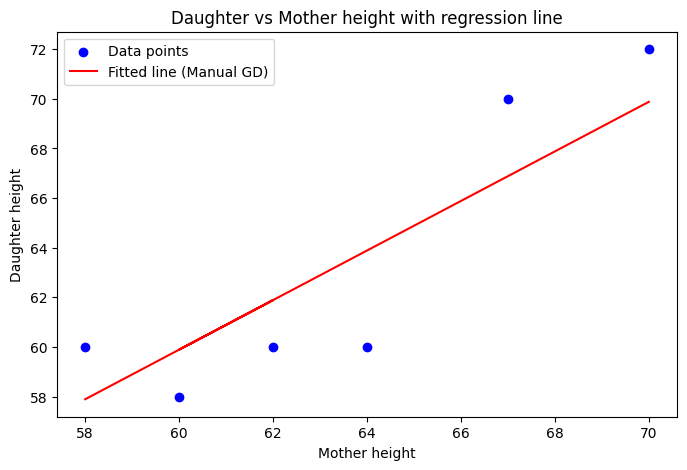


Predicted daughter's height for mother height 63: [62.88801293]


In [86]:
y_pred_manual = b0 + b1 * X
y_pred_sklearn = model.predict(X)

mse_manual = mean_squared_error(Y, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)


y_norm = (y - y.min())/(y.max() - y.min())
y_pred_norm = (y_pred_manual - y.min())/(y.max() - y.min())


print("\nMetrics for manual GD:")
print("MSE:", mse_manual)
print("RMSE:", rmse_manual)


plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, y_pred_manual, color='red', label='Fitted line (Manual GD)')
plt.xlabel("Mother height")
plt.ylabel("Daughter height")
plt.title("Daughter vs Mother height with regression line")
plt.legend()
plt.show()

new_X = 63
predicted_y = b0 + b1 * new_X
print("\nPredicted daughter's height for mother height 63:", predicted_y)



Q2.

Theta (GD coefficients): [-0.36829795  0.23550147]
Sklearn coefficients: [-5.26410791  1.16979937]
Accuracy: 0.625
Probability of passing for 3.5h: 0.6120546710346518
Probability of passing for 7.5h: 0.8018604566043814


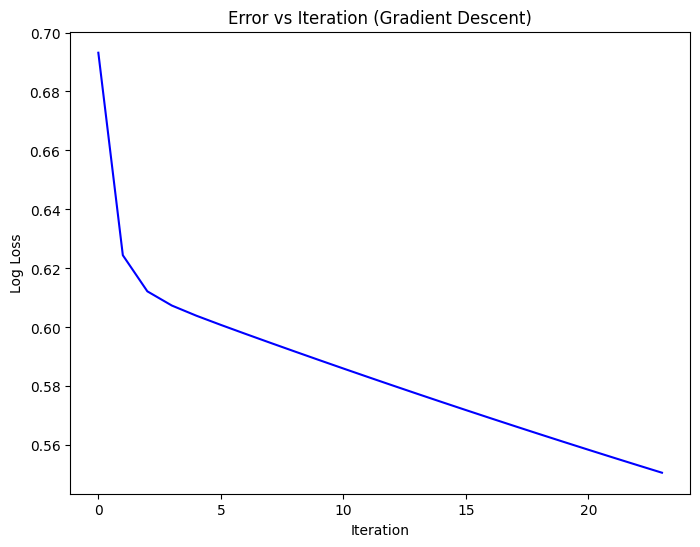

In [87]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8],
    'Pass': [0, 0, 0, 0, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.to_csv('study_data.csv', index=False)

data = pd.read_csv('study_data.csv')
X = data['Hours'].values.reshape(-1, 1)
y = data['Pass'].values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gd(X, y, lr=0.1, iterations=1000):
    m = len(y)
    X_bias = np.c_[np.ones((m,1)), X]
    theta = np.zeros(X_bias.shape[1])
    errors = []

    for i in range(iterations):
        z = np.dot(X_bias, theta)
        h = sigmoid(z)
        gradient = np.dot(X_bias.T, (h - y)) / m
        theta -= lr * gradient
        
        error = -np.mean(y*np.log(h+1e-9) + (1-y)*np.log(1-h+1e-9))
        errors.append(error)
    
    return theta, errors

theta, errors = logistic_regression_gd(X, y, lr=0.1, iterations=24)

print("Theta (GD coefficients):", theta)

model = LogisticRegression()
model.fit(X, y)
print("Sklearn coefficients:", np.concatenate(([model.intercept_[0]], model.coef_[0])))

X_bias = np.c_[np.ones((len(X),1)), X]
pred_prob = sigmoid(np.dot(X_bias, theta))
pred_class = (pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y, pred_class)
print("Accuracy:", accuracy)

new_hours = np.array([3.5, 7.5]).reshape(-1,1)
new_hours_bias = np.c_[np.ones((len(new_hours),1)), new_hours]
new_probs = sigmoid(np.dot(new_hours_bias, theta))
print("Probability of passing for 3.5h:", new_probs[0])
print("Probability of passing for 7.5h:", new_probs[1])

plt.figure(figsize=(8,6))
plt.plot(errors, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Error vs Iteration (Gradient Descent)')
plt.show()


Q3.

In [88]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


data = {
    'X1': [4, 2, 1, 3, 1, 6],
    'X2': [1, 8, 0, 2, 4, 7],
    'y': [2, -14, 1, -1, -7, -8]
}

df = pd.DataFrame(data)

# Min-max normalization 
y_min = df['y'].min()
y_max = df['y'].max()
df['y_norm'] = (df['y'] - y_min) / (y_max - y_min)

# 0 if <0.5, 1 if >=0.5
df['y_class'] = (df['y_norm'] >= 0.5).astype(int)

# Features and target
X = df[['X1', 'X2']]
y = df['y_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predictions: [1 0]
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
